In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_datasets as tfds

import os
import numpy as np
import matplotlib.pyplot as plt

**6.- Aumente el conjunto de datos. El siguiente código permite generar aumentación de datos.**

In [0]:
_URL = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Convolutional-Neural-Networks.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'Convolutional_Neural_Networks/dataset/')

In [0]:
train_dir = os.path.join(PATH, 'training_set')
test_dir = os.path.join(PATH, 'test_set')

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           validation_split=0.1)
test_image_generator = ImageDataGenerator(rescale=1./255)  # se deja un porcentaje para validacion del modelo

In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 80
IMG_WIDTH = 80

In [33]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset='training') #se toma la parte definida para entrenamiento

validation_data_gen = train_image_generator.flow_from_directory(directory=train_dir, # mismo directorio q el entrenamiento para tomar la parte de validacion
                                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 shuffle=True,
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                subset='validation')#validacion

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 7200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


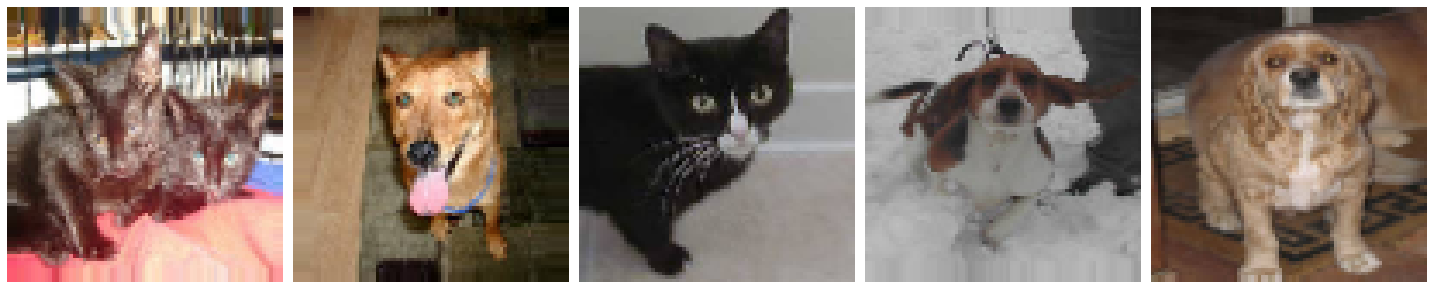

In [34]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

**a.- Reentrene las 3 redes anteriores con el nuevo dataset aumentado.**

**b.- Agregue los datos a la tabla de comparación.**

---

**MODELO EJERCICIO 3**

---

In [35]:
IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)
model3 = Sequential()
#bloque 1
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 48672)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               6230144   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 6,231,169
Trainable params: 6,231,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model3.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples //batch_size
)

Epoch 1/15
225/225 [==============================] - 40s 176ms/step - loss: 2.6022 - accuracy: 0.5756 - val_loss: 0.6039 - val_accuracy: 0.6700
Epoch 2/15
225/225 [==============================] - 38s 170ms/step - loss: 0.6016 - accuracy: 0.6744 - val_loss: 0.5611 - val_accuracy: 0.7175
Epoch 3/15
225/225 [==============================] - 38s 171ms/step - loss: 0.5754 - accuracy: 0.7060 - val_loss: 0.5341 - val_accuracy: 0.7425
Epoch 4/15
225/225 [==============================] - 38s 170ms/step - loss: 0.5466 - accuracy: 0.7243 - val_loss: 0.5193 - val_accuracy: 0.7563
Epoch 5/15
225/225 [==============================] - 38s 170ms/step - loss: 0.5233 - accuracy: 0.7467 - val_loss: 0.6900 - val_accuracy: 0.6500
Epoch 6/15
225/225 [==============================] - 38s 169ms/step - loss: 0.5108 - accuracy: 0.7549 - val_loss: 0.5020 - val_accuracy: 0.7688
Epoch 7/15
225/225 [==============================] - 38s 167ms/step - loss: 0.4974 - accuracy: 0.7663 - val_loss: 0.4799 - val_ac

In [39]:
results = model3.evaluate(test_data_gen)

63/63 [==============================] - 6s 90ms/step - loss: 0.7396 - accuracy: 0.7445


In [40]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.7395867142412398
Test accuracy: 0.7445


In [41]:
predictions = model3.predict_classes(test_data_gen, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2000, 1)


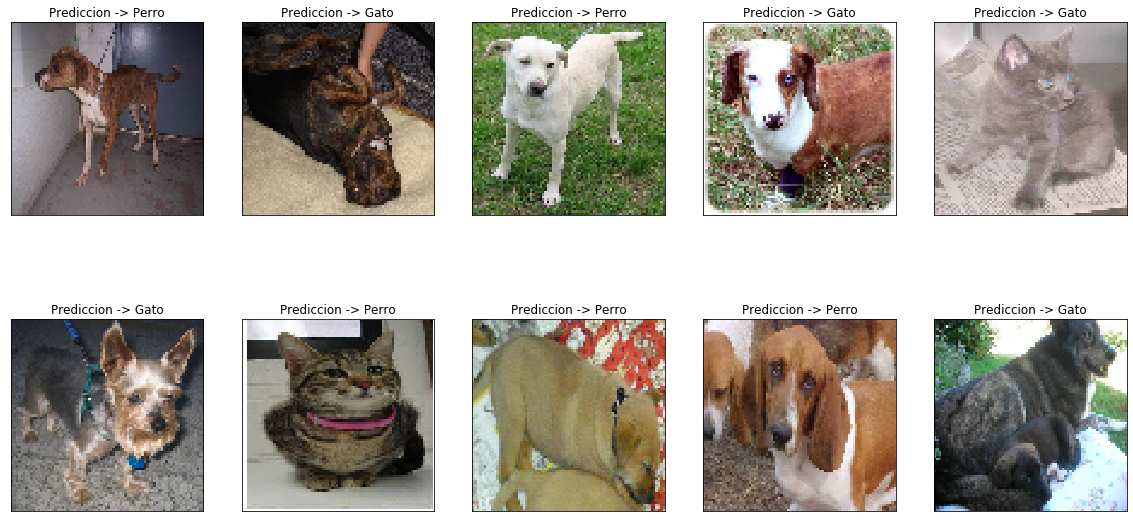

In [42]:
sample, _ = next(test_data_gen)
fig, axes = plt.subplots(2, 5, figsize=(20, 10), subplot_kw={'xticks': (), 'yticks': ()})
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(sample[:10],predictions[:10],axes.ravel()):
  ax.imshow(image)
  ax.set_title("Prediccion -> {}".format(classes[pred[0]]))

---


**MODELO EJERCICIO 4**

---



In [43]:
model4 = Sequential()
#bloque 1
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model4.add(MaxPooling2D(2,2))
model4.add(Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model4.add(MaxPooling2D(2,2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               2654336   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [0]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model4.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples //batch_size
)

Epoch 1/15
225/225 [==============================] - 40s 178ms/step - loss: 0.7029 - accuracy: 0.5971 - val_loss: 0.5964 - val_accuracy: 0.7100
Epoch 2/15
225/225 [==============================] - 39s 171ms/step - loss: 0.6027 - accuracy: 0.6793 - val_loss: 0.6110 - val_accuracy: 0.6237
Epoch 3/15
225/225 [==============================] - 39s 172ms/step - loss: 0.5585 - accuracy: 0.7168 - val_loss: 0.5059 - val_accuracy: 0.7675
Epoch 4/15
225/225 [==============================] - 38s 170ms/step - loss: 0.5328 - accuracy: 0.7311 - val_loss: 0.4989 - val_accuracy: 0.7663
Epoch 5/15
225/225 [==============================] - 39s 172ms/step - loss: 0.5099 - accuracy: 0.7510 - val_loss: 0.4717 - val_accuracy: 0.7713
Epoch 6/15
225/225 [==============================] - 38s 170ms/step - loss: 0.4904 - accuracy: 0.7610 - val_loss: 0.9522 - val_accuracy: 0.6212
Epoch 7/15
225/225 [==============================] - 38s 170ms/step - loss: 0.4730 - accuracy: 0.7769 - val_loss: 0.4880 - val_ac

In [46]:
results = model4.evaluate(test_data_gen)

63/63 [==============================] - 6s 89ms/step - loss: 0.4574 - accuracy: 0.7965


In [47]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.45742410823466284
Test accuracy: 0.7965


In [48]:
predictions = model4.predict_classes(test_data_gen, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2000, 1)


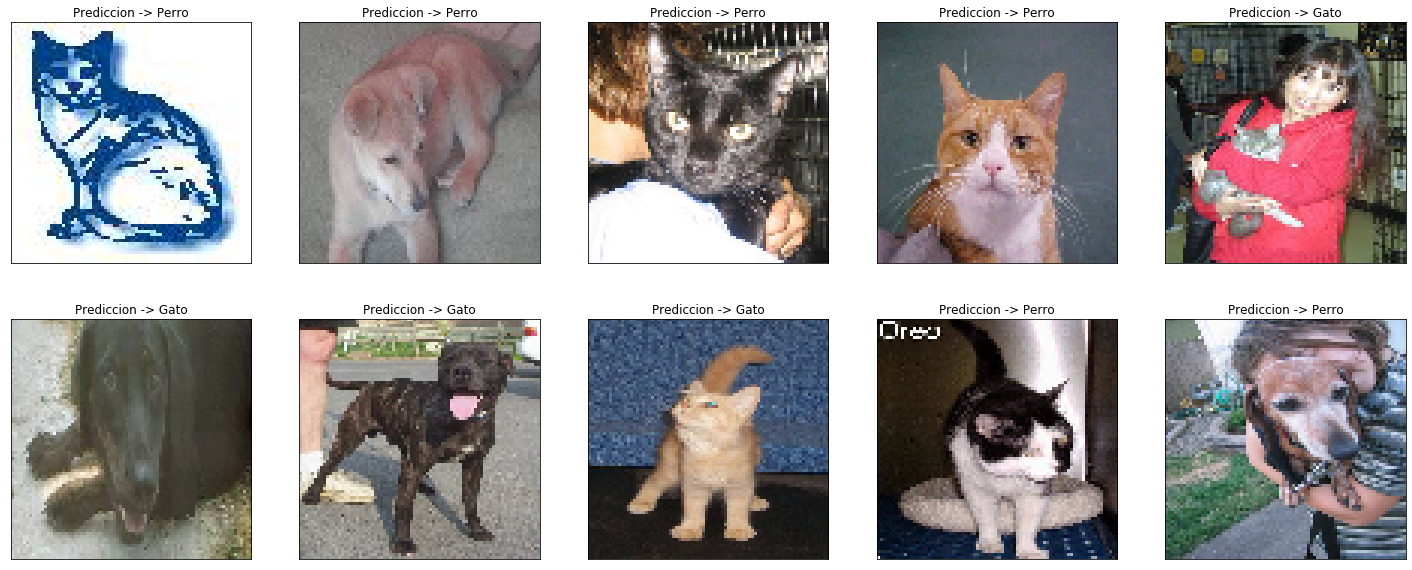

In [50]:
sample, _ = next(test_data_gen)
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={'xticks': (), 'yticks': ()})
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(sample[:10],predictions[:10],axes.ravel()):
  ax.imshow(image)
  ax.set_title("Prediccion -> {}".format(classes[pred[0]]))

---

**MODELO 5**

---

In [51]:
model5 = Sequential()
#bloque 1
model5.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE))
model5.add(MaxPooling2D(2,2))
model5.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE))
model5.add(MaxPooling2D(2,2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2654336   
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

In [0]:
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model5.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples //batch_size
)

Epoch 1/15
225/225 [==============================] - 42s 186ms/step - loss: 7.6420 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/15
225/225 [==============================] - 40s 180ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/15
225/225 [==============================] - 40s 180ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 4/15
225/225 [==============================] - 40s 179ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/15
225/225 [==============================] - 40s 180ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 6/15
225/225 [==============================] - 40s 180ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 7/15
225/225 [==============================] - 40s 180ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_ac

In [54]:
results = model5.evaluate(test_data_gen)

63/63 [==============================] - 6s 91ms/step - loss: 36.2269 - accuracy: 0.5000


In [55]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 36.22694215320406
Test accuracy: 0.5


In [56]:
predictions = model4.predict_classes(test_data_gen, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2000, 1)


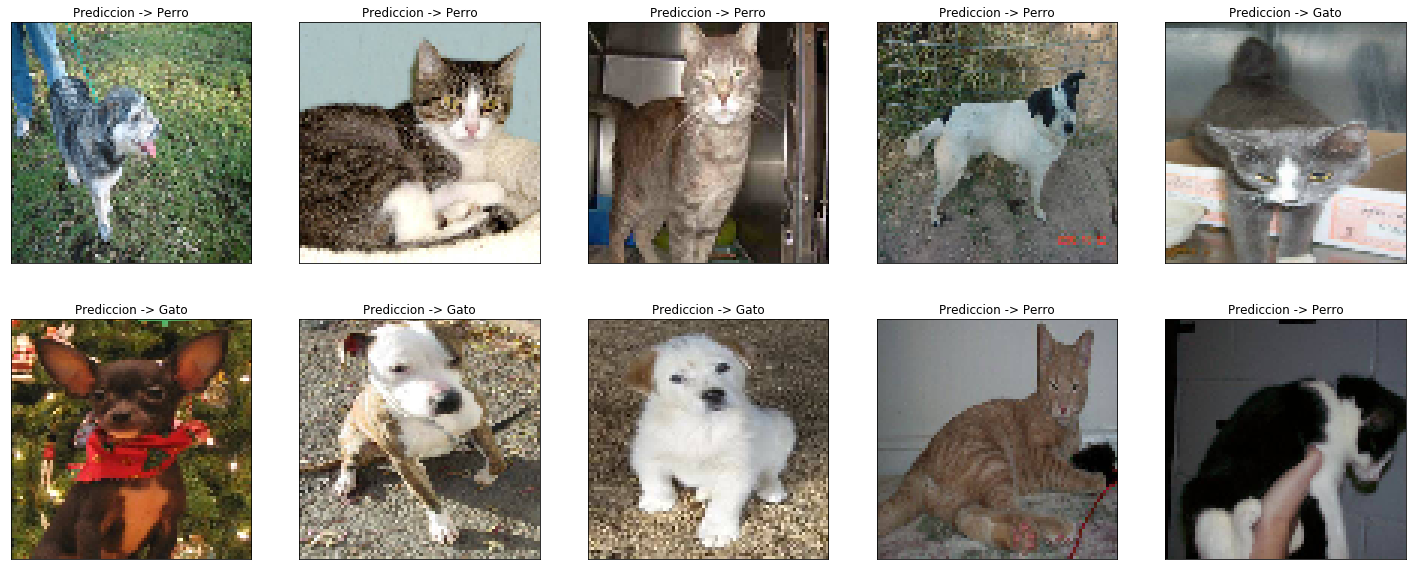

In [57]:
sample, _ = next(test_data_gen)
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={'xticks': (), 'yticks': ()})
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(sample[:10],predictions[:10],axes.ravel()):
  ax.imshow(image)
  ax.set_title("Prediccion -> {}".format(classes[pred[0]]))